In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint

model=Sequential([
    Dense(128,activation="sigmoid",input_shape=(10,)),
    Dense(1)
])

model.compile(optimizer='sgd',loss=BinaryCrossentropy(from_logits=True))

checkpoint=ModelCheckpoint('keras_model.h5',save_weights_only=True)

model.fit(X_train,y_train,epochs=10,callbacks=[checkpoint])

model.save_weights('my_model')

NameError: name 'X_train' is not defined

In [1]:
import tensorflow as tf

(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()
x_train=x_train/255.
x_test=x_test/255.

#속도향상을 위한 데이터셋 갯수 제한 줄이기
x_train=x_train[:10000]
y_train=y_train[:10000]
x_test=x_test[:1000]
y_test=y_test[:1000]


In [3]:
x_train.shape
y_train.shape

(10000, 1)

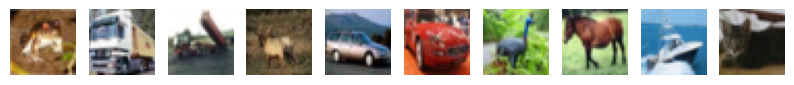

In [7]:
import matplotlib.pyplot as plt

''' 
subplot과 subplots는 다름. 
- fig는 그림 전체 서브플롯 전체 사이즈를 말함
- ax는 전체 중 낱낱개를 말함
- ax는 그림안에 그림 이런 느낌인듯
- subplot은 단일 axe만 받을 수 있음

set_axis_off
지금의 경우 동일하게 할 수 있음
'''
# fig,ax=plt.subplots(1,10,figsize=(10,1))
# for i in range(10):
#     ax[i].set_axis_off()
#     ax[i].imshow(x_train[i])

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(1,10,i+1),plt.imshow(x_train[i]),plt.axis('off')
plt.show()
    
#     plt.figure(figsize=(10,10))
# for index in range(10):
#     plt.subplot(1,10,index+1),plt.imshow(test_images[index],cmap='gray')
# plt.show()


테스트 정확도 리턴 함수

In [58]:
def get_test_accuracy(model,x,y):
    test_loss,test_acc=model.evaluate(x=x_test,y=y_test,verbose=0)
    print('accuracy: {acc:0.3f}'.format(acc=test_acc))

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D

def get_new_model():
    model=Sequential([
        Conv2D(filters=16,input_shape=(32,32,3),kernel_size=(3,3),activation='relu',name='conv_1'),#필터는 output feature임
        Conv2D(filters=8,kernel_size=(3,3),activation='relu',name='conv_2'),
        MaxPooling2D(pool_size=(4,4),name='pool_1'),
        Flatten(name='Flatten'),
        Dense(units=32,activation='relu',name='dense_1'),
        Dense(units=10,activation='softmax',name='dense_2')
    ])

    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

    return model





In [ ]:
model=get_new_model()

model.summary()

In [44]:
get_test_accuracy(model,x_test,y_test)

accuracy: 0.456


In [39]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_path='model_checkpoints/checkpoint'
checkpoint=ModelCheckpoint(filepath=checkpoint_path,frequency='epoch',save_weights_only=True,verbose=1)

In [ ]:
model.fit(x=x_train,y=y_train,epochs=3,callbacks=[checkpoint])

In [ ]:
ls -1h model_checkpoints

In [45]:
model.load_weights(checkpoint_path)
get_test_accuracy(model,x_test,y_test)
# 위에랑 acc동일함

accuracy: 0.456


In [47]:
# clear directory
rs -r model_checkpoints

SyntaxError: invalid syntax (3971328563.py, line 2)

In [ ]:
'''
콜백함수를 이용하여 에폭당 가중치값 저장하는 실습을 해봤음
좀 더 유연성있게 모델을 저장하고 싶은 경우를 위해 모델 체크포인트의 추가적인 옵션들을 확인 예정
'''

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

def get_new_model123():
    model=Sequential([
        Dense(units=32,activation='relu',name='dense_1'),
        Dropout(0.3),
        Dense(units=10,activation='softmax',name='dense_2')
    ])

    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

    return model

checkpoint_path='model_checkpoints/checkpoint'
checkpoint=ModelCheckpoint('training_run/my_model.{epoch}-{val_loss:.4f}',monitor='val_loss') #save_freq 인수가 정수인 경우 에폭수가 아니라 샘플수임

In [75]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True,to_file='model.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.



checkpoint = ModelCheckpoint('train1/my_model{epoch}', save_weights_only=True, save_best_only=True, monitor='val_loss')
history = model.fit(X_train, y_train, epochs=10, batch_size=64, callbacks=[checkpoint])
이런 경우 검증 손실이 최소인 경우만 저장하므로 몇개의 가중치 샘플이 저장되는지 말할 수 없음

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_5000_path= 'model_checkpoints_5000/checkpoint_{epoch:02d}_{batch:04d}'
checkpoint_5000=ModelCheckpoint(filepath=checkpoint_5000_path,save_weights=True,save_freq=5000,verbose=1)


In [9]:

model=get_new_model()
model.fit(x=x_train,y=y_train,epochs=3,validation_data=(x_test,y_test),batch_size=10,callbacks=[checkpoint_5000])

NameError: name 'checkpoint_5000' is not defined

In [ ]:
ls -lh model_checkpoints_5000

In [42]:
model=get_new_model()

In [46]:
checkpoint_best_path='model_checkpoints_best/checkpoint'
checkpoint_best=ModelCheckpoint(filepath=checkpoint_best_path,save_weights_only=True,save_freq='epoch',monitor='val_accuracy',save_best_only=True,verbose=1)

In [3]:
history=model.fit(x=x_train,y=y_train,epochs=50,validation_data=(x_test,y_test),batch_size=10,callbacks=[checkpoint_best],verbose=1)

NameError: name 'model' is not defined

결과 시각화

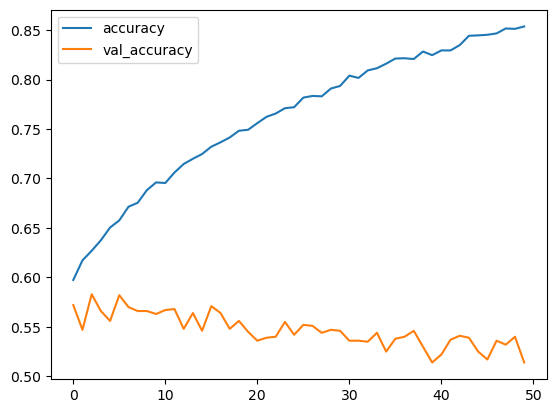

In [50]:
import pandas as pd
df=pd.DataFrame(history.history)
df.plot(y=['accuracy','val_accuracy'])


import matplotlib as plt


In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('acc')
plt.xlabel('epochs')
plt.legend(['training','validation'],loc=(0.5, 0.5))
plt.show()


가중치 로딩

In [62]:
model1=get_new_model()
model1.load_weights(checkpoint_best_path)
get_test_accuracy(model1,x=x_test,y=y_test)
get_test_accuracy(model,x=x_test,y=y_test)

accuracy: 0.583
accuracy: 0.514


In [ ]:
# my_model/variables/variables.data=00000-of-00001
my_

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_path='model_checkpoints_best/checkpoint'
checkpoint_best=ModelCheckpoint(filepath=checkpoint_best_path,save_weights_only=True,save_freq='epoch',monitor='val_accuracy',save_best_only=True,verbose=1)